# Unidad 5: Introducción a Archivos NetCDF y su Manipulación en Python - continuación




In [7]:
import xarray as xr

# Abrir el dataset original
ds = xr.open_dataset('datos/era5_2000_aug_celsius.nc')
t2m_celsius = ds['t2m']

In [9]:
print(ds)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-08-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-06-04 13:45:49 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...


Vamos a realizar un recorte sobre Argentina:

- Latitud: -20 a -55 → en orden norte a sur, slice(-20, -55)
- Longitud: 285 a 330 (equivalente a -75° a -30° en coordenadas -180 a 180)

In [2]:
# Recorte de Argentina
t2m_arg = t2m_celsius.sel(
    latitude=slice(-20, -55),
    longitude=slice(285, 330)
)

print(t2m_arg)

<xarray.DataArray 't2m' (time: 1, latitude: 141, longitude: 181)>
[25521 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 285.0 285.2 285.5 285.8 ... 329.5 329.8 330.0
  * latitude   (latitude) float32 -20.0 -20.25 -20.5 ... -54.5 -54.75 -55.0
  * time       (time) datetime64[ns] 2000-08-01
Attributes:
    units:    °C


In [4]:

# Convertir a dataset con solo 't2m'
ds_arg = t2m_arg.to_dataset(name='t2m')
print(ds_arg)

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 141, time: 1)
Coordinates:
  * longitude  (longitude) float32 285.0 285.2 285.5 285.8 ... 329.5 329.8 330.0
  * latitude   (latitude) float32 -20.0 -20.25 -20.5 ... -54.5 -54.75 -55.0
  * time       (time) datetime64[ns] 2000-08-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...


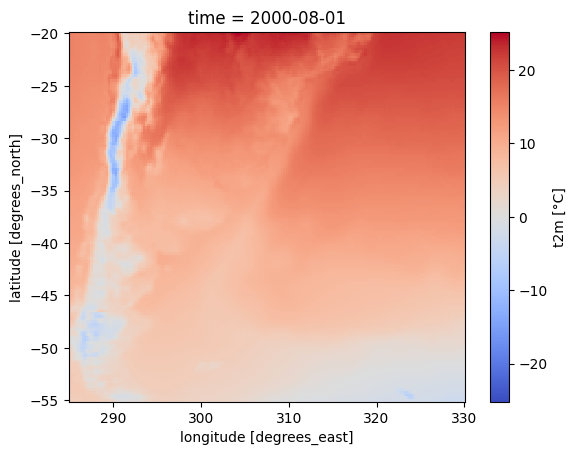

In [5]:
ds_arg['t2m'].sel(time=ds.time[0]).plot(cmap='coolwarm')

In [ ]:

# Guardar
ds_arg.to_netcdf('datos/era5_argentina_t2m_celsius.nc')


In [13]:
import matplotlib.pyplot as plt 


# Plano 2D de temperatura en °C
t2m_vals = ds_arg['t2m'].sel(time=ds.time[0]).values.flatten()

ds_arg['t2m']
→ Extrae la variable t2m del dataset ds_arg.
Resultado: un xarray.DataArray con dimensiones (time, latitude, longitude).

.sel(time=ds.time[0])
→ Selecciona el primer (y único) valor de la dimensión time.
Esto reduce la variable a 2D: (latitude, longitude).

.values
→ Extrae los datos como un array de NumPy (numpy.ndarray).
Ya no es un objeto xarray.

.flatten()
→ Convierte la matriz 2D (lat × lon) en un vector 1D.
Es decir, aplana todos los valores en una sola dimensión, útil por ejemplo para histogramas.

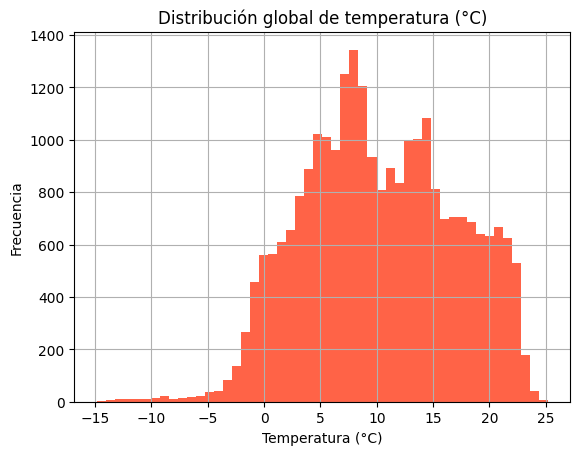

In [14]:

# Histograma
plt.hist(t2m_vals, bins=50, color='tomato')
plt.title('Distribución global de temperatura (°C)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [16]:
# Seleccionar el punto más cercano
punto = ds.sel(latitude=-24.7, longitude=250, method='nearest')

# Mostrar los valores
print("Temperatura (°C):", punto['t2m'].values[0])
print("Viento u10:", punto['u10'].values[0])
print("Viento v10:", punto['v10'].values[0])

Temperatura (°C): 19.54715
Viento u10: -2.6009045
Viento v10: 1.1890073
